## 1. Implementation of MNIST Classifier


In [7]:
import numpy as np
from termcolor import colored
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
plt.style.use("seaborn")

#Load mnist dataset
(train_images, train_labels), test_datasets = mnist.load_data()

#Set params
N = train_images.shape[0]
n_feature = train_images.shape[1] * train_images.shape[2]
epochs = 20
lr = 0.03
batch_size = 64
n_batch = N // batch_size
units = [64, 32, 10]

#Initialize W, B
W1 = np.random.normal(0, 1, (n_feature, units[0]))
B1 = np.zeros(units[0], )

W2 = np.random.normal(0, 1, (units[0], units[1]))
B2 = np.zeros(units[1], )

W3 = np.random.normal(0, 1, (units[1], units[2]))
B3 = np.zeros(units[2], )

#Confirm
print(colored("W/B shapes", "green"))
print(f"W1/B1: {W1.shape}/{B1.shape}")
print(f"W2/B2: {W2.shape}/{B2.shape}")
print(f"W3/B3: {W3.shape}/{B3.shape}")

W/B shapes
W1/B1: (784, 64)/(64,)
W2/B2: (64, 32)/(32,)
W3/B3: (32, 10)/(10,)


In [8]:
losses, accs = list(), list()
for epoch in range(epochs):
    n_correct, n_data = 0, 0
    for batch_idx in range(n_batch):

        #Get mini-batch
        start_idx = batch_idx * batch_size
        end_idx = (batch_idx + 1) * batch_size
        X = train_images[start_idx : end_idx, :].reshape(batch_size, -1)
        Y = train_labels[start_idx : end_idx]

        #Forward propagation
        ##Dense 01
        Z1 = X @ W1 + B1
        A1 = 1 / (1 + np.exp(-Z1))

        ##Dense 02
        Z2 = A1 @ W2 + B2
        A2 = 1 / (1 + np.exp(-Z2))

        ##Dense 03
        L = A2 @ W3 + B3

        ##Loss
        Pred = np.exp(L) / np.sum(np.exp(L), axis = 1, keepdims = True) #Softmax
        J = np.mean(-np.log(Pred[np.arange(batch_size), Y])) #CCEE
        losses.append(J)

        ##Calculate accuracy
        Pred_labels = np.argmax(Pred, axis = 1)
        n_correct += np.sum(Pred_labels == Y)
        n_data += batch_size

        #Backpropagation

        ##Label one hot encoding
        labels = Y.copy()
        Y = np.zeros_like(Pred)
        Y[np.arange(batch_size), labels] = 1

        ##Jacobians
        ###Loss
        dL = -1/batch_size * (Y - Pred)

        ###Dense 03
        dA2 = dL @ W3.T
        dW3 = A2.T @ dL
        dB3 = np.sum(dL, axis = 0)

        ###Dense 02
        dZ2 = dA2 * A2 * (1 - A2)
        dA1 = dZ2 @ W2.T
        dW2 = A1.T @ dZ2
        dB2 = np.sum(dZ2, axis = 0)

        ###Dense 03
        dZ1 = dA1 * A1 * (1 - A1)
        dW1 = X.T @ dZ1
        dB1 = np.sum(dZ1, axis = 0)

        #Parameter update
        W3, B3 = W3 - lr * dW3, B3 - lr * dB3
        W2, B2 = W2 - lr * dW2, B2 - lr * dB2
        W1, B1 = W1 - lr * dW1, B1 - lr * dB1

    accs.append(n_correct / n_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


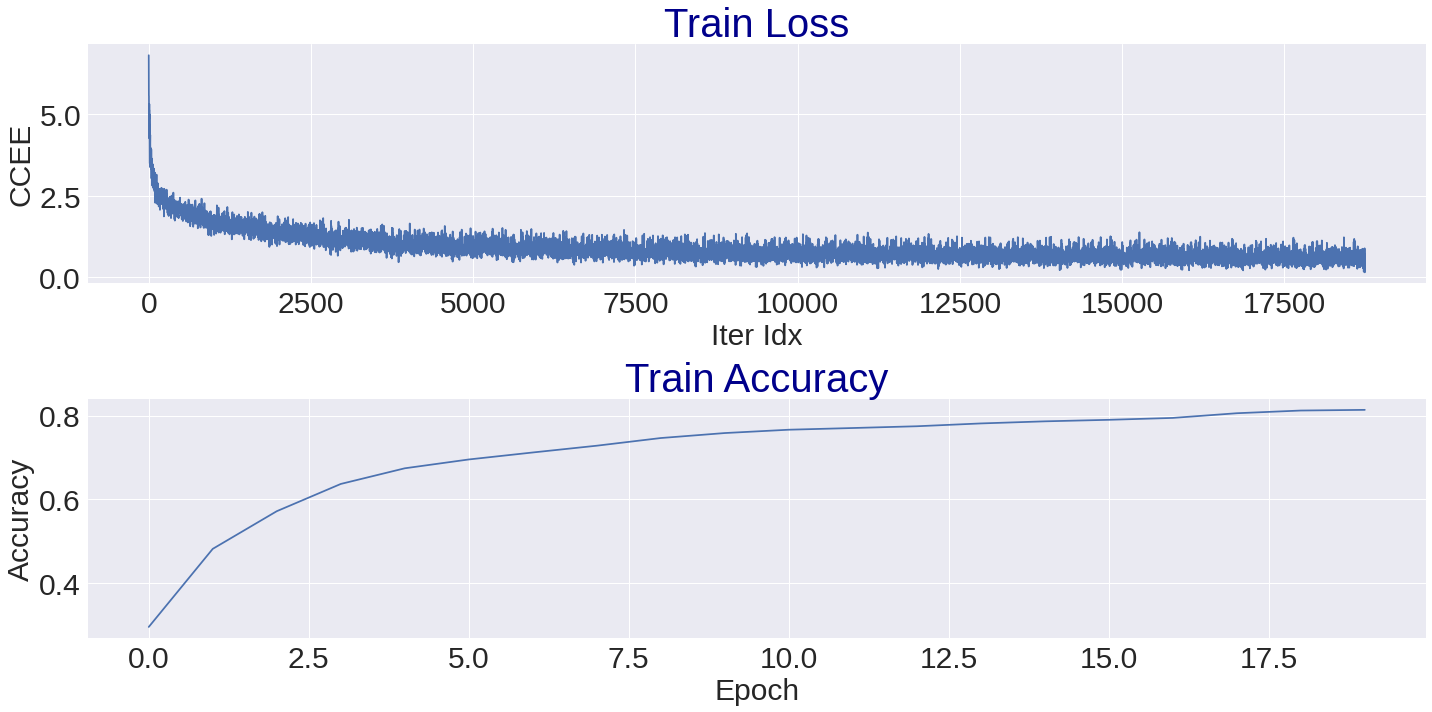

In [9]:
fig, axes = plt.subplots(2, 1, figsize = (20, 10))

axes[0].plot(losses)
axes[1].plot(accs)

axes[0].tick_params(labelsize = 30)
axes[0].set_title("Train Loss", color = "darkblue", fontsize = 40)
axes[0].set_xlabel("Iter Idx", fontsize = 30)
axes[0].set_ylabel("CCEE", fontsize = 30)

axes[1].tick_params(labelsize = 30)
axes[1].set_title("Train Accuracy", color = "darkblue", fontsize = 40)
axes[1].set_xlabel("Epoch", fontsize = 30)
axes[1].set_ylabel("Accuracy", fontsize = 30)

fig.tight_layout()